<div class='alert alert-info'>
    <h2>Agrupación categórica</h2>
</div>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
gender = ['Male', 'Female']
income = ['Poor', 'Middel', 'Rich']

In [3]:
n = 500 # size dataframe

gender_data = []
income_data = []

for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
    


In [4]:
# n = media + desviación * distribución
height = (160 + 30*np.random.randn(n)).astype(int)
weight = (65 + 25*np.random.randn(n)).astype(int)
age = (30 + 12*np.random.randn(n)).astype(int)
income = 18000 + 3500*np.random.randn(n)

In [5]:
data = pd.DataFrame(
    {
        'Gender': gender_data,
        'Economic Status': income_data,
        'Height': height,
        'Weight': weight,
        'Age': age,
        'Income': income
    }
)

data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,131,90,33,20045.238352
1,Male,Rich,174,77,11,16674.728809
2,Male,Rich,180,119,33,21701.154796
3,Male,Middel,117,70,27,22407.589992
4,Female,Rich,159,31,35,20901.904433


In [6]:
gruped_gender = data.groupby('Gender')

gruped_gender.groups

{'Female': Int64Index([  4,   8,   9,  13,  17,  20,  21,  24,  25,  26,
             ...
             476, 477, 478, 479, 480, 484, 487, 493, 495, 497],
            dtype='int64', length=225),
 'Male': Int64Index([  0,   1,   2,   3,   5,   6,   7,  10,  11,  12,
             ...
             486, 488, 489, 490, 491, 492, 494, 496, 498, 499],
            dtype='int64', length=275)}

In [7]:
for names, groups in gruped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status  Height  Weight  Age        Income
4    Female            Rich     159      31   35  20901.904433
8    Female          Middel     139      21   45  19560.218525
9    Female          Middel     125      95    6  18753.009486
13   Female            Poor     161      37   52  18168.465633
17   Female          Middel     111      66   35  23782.584230
20   Female            Rich     165      91   36  13694.637369
21   Female          Middel     160      59   31  22503.505759
24   Female          Middel     160      85   23  13167.299914
25   Female            Rich     144      92   36  15544.520249
26   Female            Poor     165      53   36  19222.038840
30   Female          Middel     196      91   32  18821.256127
31   Female            Rich     150      68   44  15598.985158
34   Female          Middel     166      90   23  18940.755718
35   Female          Middel     154      52   36  16612.018776
36   Female            Poor     134      51   39

In [8]:
gruped_gender.get_group('Female').head()

,Gender,Economic Status,Height,Weight,Age,Income
4,Female,Rich,159,31,35,20901.904433
8,Female,Middel,139,21,45,19560.218525
9,Female,Middel,125,95,6,18753.009486
13,Female,Poor,161,37,52,18168.465633
17,Female,Middel,111,66,35,23782.584230


## Doble agrupación

In [9]:
double = data.groupby(['Gender', 'Economic Status'])
for names, groups in double:
    print(names)

('Female', 'Middel')
('Female', 'Poor')
('Female', 'Rich')
('Male', 'Middel')
('Male', 'Poor')
('Male', 'Rich')


<div class='alert alert-success'>
    <h3>Operaciones sobre datos agrupados.</h3>
</div>

In [10]:
double.sum()

Height  Weight   Age        Income
Gender Economic Status                                    
Female Middel            12252    5172  2242  1.328433e+06
       Poor              11597    4732  2277  1.330694e+06
       Rich              11551    4575  2378  1.373735e+06
Male   Middel            14035    6045  2606  1.638966e+06
       Poor              13928    5720  2753  1.556804e+06
       Rich              15852    6233  2993  1.701719e+06

In [11]:
double.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middel           161.210526  68.052632  29.500000  17479.377348
       Poor             154.626667  63.093333  30.360000  17742.582760
       Rich             156.094595  61.824324  32.135135  18563.983905
Male   Middel           154.230769  66.428571  28.637363  18010.615506
       Poor             160.091954  65.747126  31.643678  17894.295704
       Rich             163.422680  64.257732  30.855670  17543.498226

In [12]:
double.size()

Gender  Economic Status
Female  Middel             76
        Poor               75
        Rich               74
Male    Middel             91
        Poor               87
        Rich               97
dtype: int64

In [13]:
double.describe()

Height                                               \
                        count        mean        std    min     25%    50%   
Gender Economic Status                                                       
Female Middel            76.0  161.210526  30.993468   93.0  139.00  166.0   
       Poor              75.0  154.626667  27.125720   88.0  136.50  157.0   
       Rich              74.0  156.094595  26.842600  108.0  135.25  154.0   
Male   Middel            91.0  154.230769  29.652835   85.0  137.50  154.0   
       Poor              87.0  160.091954  27.307735   68.0  144.00  160.0   
       Rich              97.0  163.422680  32.530702   70.0  140.00  164.0   

                                      Weight             ...    Age        \
                           75%    max  count       mean  ...    75%   max   
Gender Economic Status                                   ...                
Female Middel           180.50  232.0   76.0  68.052632  ...  36.25  54.0   
       Poor             171.00  242.0   75.0  63.093333  ...  37.00  61.0   
       Rich             171.75  248.0   74.0  61.824324  ...  40.75  57.0   
Male   Middel           173.50  238.0   91.0  66.428571  ...  35.50  61.0   
       Poor             177.00  244.0   87.0  65.747126  ...  40.00  61.0   
       Rich             185.00  228.0   97.0  64.257732  ...  39.00  56.0   

                       Income                                           \
                        count          mean          std           min   
Gender Economic Status                                                   
Female Middel            76.0  17479.377348  3166.993491   9566.384651   
       Poor              75.0  17742.582760  3568.717391   7864.434028   
       Rich              74.0  18563.983905  3227.442839  12261.667689   
Male   Middel            91.0  18010.615506  3882.781045  10791.331011   
       Poor              87.0  17894.295704  3160.445667  12000.535180   
       Rich              97.0  17543.498226  3549.472753   8204.067339   

                                                                                
                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middel           15643.814394  17094.714328  19462.620641  24323.068851  
       Poor             15591.490066  17684.071637  19520.126018  27070.867637  
       Rich             15654.755852  18472.441631  21019.939717  25587.868218  
Male   Middel           15356.792630  18201.585559  20786.295533  26812.842213  
       Poor             15852.227440  17616.484892  20023.877368  24450.965451  
       Rich             14821.500941  17589.659527  19697.126998  25546.248933  

[6 rows x 32 columns]

In [14]:
gruped_income = double['Income']
gruped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middel            76.0  17479.377348  3166.993491   9566.384651   
       Poor              75.0  17742.582760  3568.717391   7864.434028   
       Rich              74.0  18563.983905  3227.442839  12261.667689   
Male   Middel            91.0  18010.615506  3882.781045  10791.331011   
       Poor              87.0  17894.295704  3160.445667  12000.535180   
       Rich              97.0  17543.498226  3549.472753   8204.067339   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middel           15643.814394  17094.714328  19462.620641  24323.068851  
       Poor             15591.490066  17684.071637  19520.126018  27070.867637  
       Rich             15654.755852  18472.441631  21019.939717  25587.868218  
Male   Middel           15356.792630  18201.585559  20786.295533  26812.842213  
       Poor             15852.227440  17616.484892  20023.877368  24450.965451  
       Rich             14821.500941  17589.659527  19697.126998  25546.248933

In [15]:
double.aggregate(
    {
        'Income': np.sum,
        'Age': np.mean,
        'Height': np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middel           1.328433e+06  29.500000  30.993468
       Poor             1.330694e+06  30.360000  27.125720
       Rich             1.373735e+06  32.135135  26.842600
Male   Middel           1.638966e+06  28.637363  29.652835
       Poor             1.556804e+06  31.643678  27.307735
       Rich             1.701719e+06  30.855670  32.530702

In [16]:
double.aggregate(
    {
        'Age': np.mean,
        'Height': lambda h: np.mean(h) / np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middel           29.500000  5.235997
       Poor             30.360000  5.738758
       Rich             32.135135  5.854876
Male   Middel           28.637363  5.230031
       Poor             31.643678  5.896499
       Rich             30.855670  5.049741

In [17]:
double.aggregate([np.sum, np.mean])

Height             Weight              Age             \
                          sum        mean    sum       mean   sum       mean   
Gender Economic Status                                                         
Female Middel           12252  161.210526   5172  68.052632  2242  29.500000   
       Poor             11597  154.626667   4732  63.093333  2277  30.360000   
       Rich             11551  156.094595   4575  61.824324  2378  32.135135   
Male   Middel           14035  154.230769   6045  66.428571  2606  28.637363   
       Poor             13928  160.091954   5720  65.747126  2753  31.643678   
       Rich             15852  163.422680   6233  64.257732  2993  30.855670   

                              Income                
                                 sum          mean  
Gender Economic Status                              
Female Middel           1.328433e+06  17479.377348  
       Poor             1.330694e+06  17742.582760  
       Rich             1.373735e+06  18563.983905  
Male   Middel           1.638966e+06  18010.615506  
       Poor             1.556804e+06  17894.295704  
       Rich             1.701719e+06  17543.498226

<div class='alert alert-success'>
    <h3>Filtrado de Datos.</h3>
</div>

In [18]:

double['Age'].filter(lambda x: x.sum() > 2400);

In [19]:
# Transformación
zscore = lambda h: np.mean(h) / np.std(h)
double.transform(zscore).head()

,Height,Weight,Age,Income
0,5.896499,2.337471,2.533526,5.694776
1,5.049741,2.688046,2.873062,4.968240
2,5.049741,2.688046,2.873062,4.968240
3,5.230031,2.740895,2.423246,4.664285
4,5.854876,2.415409,2.833105,5.791180


<div class='alert alert-success'>
    <h3>Conjunto de entrenamiento y testing.</h3>
</div>

In [20]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')
len(data)

3333

## Dividir con distribución normal

In [21]:
a = np.random.randn(3333)
check = (a<0.8)
check

array([ True, False,  True, ...,  True, False,  True])

(array([ 722.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2611.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

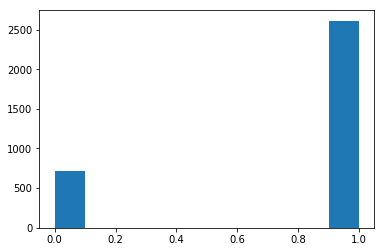

In [25]:
plt.hist(check.astype(int))

Vemos que aproximadamente el 80% esta en True y el resto en False

In [26]:
training = data[check]
testing = data[~check]

In [31]:
print(len(training))
print(len(testing))
print(len(testing)/3333)

2611
722
0.21662166216621662


## Usando sklearn

In [32]:
# Validación cruzada

train, test = train_test_split(data, test_size = 0.2)

In [33]:
len(train)

2666

## Usando función shuffle

In [35]:
from sklearn.utils import shuffle
data = shuffle(data);

In [38]:
train_data = data[:int(0.75*len(data))]
test_data = data[int(0.75*len(data))+1:]